# 1. Language Processing and Python

## part 1: getting started with NLTK

首先install nltk 套件

In [ ]:
pip install nltk

再下載 NLTK Book 套件，執行底下指令

In [8]:
from nltk import *
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

會出現一個介面，要下載identifier那欄的'book' 

<img src="https://i.imgur.com/YdTSN7b.jpg" />

In [2]:
# 他會列出一些文集
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [8]:
# 現在輸入text1會輸出書名
text1

<Text: Moby Dick by Herman Melville 1851>

## 1.3 搜尋字串
### concordance() 會列出所找的字串在那些句子中

In [10]:
text1.concordance("heathenish")

Displaying 6 of 6 matches:
is entry was hung all over with a heathenish array of monstrous clubs and spea
anwhile humming to himself in his heathenish way . But being now interrupted ,
mpty - handedness , they , in the heathenish sharked waters , and by the beach
crew , were a far more barbaric , heathenish , and motley set than any of the 
it might include . There was some heathenish , coffin - coloured old lumber ab
 , intermeddling , monopolising , heathenish old scamp , to be one day making 


### similar() 搜尋與字串意思相近的詞

In [ ]:
text2.similar("monstrous")

very heartily so exceedingly remarkably as vast a great amazingly<br>
extremely good sweet

### common_contexts() 搜尋文章內關鍵字可以共同運用的內容

In [5]:
text2.common_contexts(["very", "too"])

was_young was_well was_much ,_anxious know_well is_well it_much
him_well are_good be_much been_much had_much ,_much the_great ,_,


上面的output => was_young 中的底線可以填入"very" 或 "too" ，變成was 'very' young、was 'too' young，以此類推....。

### dispersion_plot() 繪圖來表示詞在文中出現的位置

要繪圖之前需先安裝Matplotlib <br>
打開命令提示字元，輸入以下指令即可安裝 <br>
pip install -U pip setuptools <br>
pip install matplotlib

In [3]:
# 繪畫出括弧中的詞在文章text4中出現的位置
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

![Imgur](https://i.imgur.com/CDRhQFo.png)

## part 2   Computing with Language: Simple Statistics

## 2.1   Frequency Distributions

### NLTK提供內建的函式FreqDist()來計算文章中token的頻率

In [ ]:
flist = FreqDist(text1)
print(flist)
flist

<\FreqDist with 19317 samples and 260819 outcomes><br>
FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

### most_common() 搜尋出現頻率最高的前10個token

In [24]:
flist.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

### 搜尋某個特定token在文中出現的頻率

In [34]:
flist['so']

918

### plot() 繪畫出頻率分佈圖

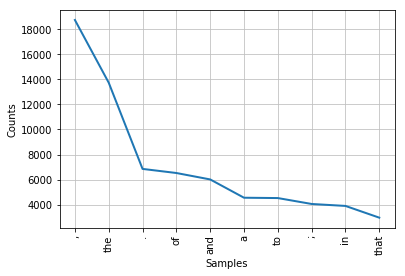

In [8]:
# 第一個參數為token的數量,若要顯示token累計數量,cumulative=True,反之則False,預設的為False

flist.plot(10, cumulative=False)

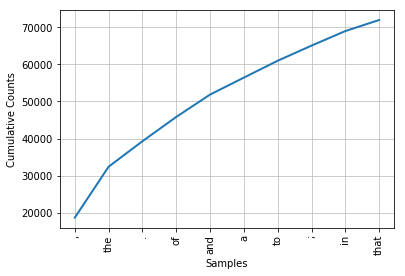

In [9]:
#顯示token累計數量
flist.plot(10, cumulative=True)

### 使用hapaxes()來搜尋只出現過一次的token

In [65]:
flist.hapaxes()

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',.....]

## 2.2   Fine-grained Selection of Words

### 以特定的條件來搜尋token

### 範例 1：找出文集text1全部長度大於15的token

In [52]:
V = set(text1)
long_words = [w for w in V if len(w) > 15]

print(long_words)

['CIRCUMNAVIGATION', 'undiscriminating', 'characteristically', 'uncompromisedness', 'uncomfortableness', 'responsibilities', 'indispensableness', 'subterraneousness', 'preternaturalness', 'circumnavigations', 'simultaneousness', 'physiognomically', 'superstitiousness', 'irresistibleness', 'cannibalistically', 'indiscriminately', 'comprehensiveness', 'hermaphroditical', 'apprehensiveness', 'uninterpenetratingly', 'circumnavigation', 'Physiognomically', 'circumnavigating', 'supernaturalness']


### 範例 2：找出text2全部長度大於10和出現頻率大於20的token

In [63]:
flist2 = FreqDist(text2)
print(sorted(w for w in set(text2) if len(w) > 10 and flist2[w] > 20))

['acquaintance', 'affectionate', 'circumstances', 'comfortable', 'conversation', 'countenance', 'disappointment', 'disposition', 'exceedingly', 'expectation', 'immediately', 'opportunity', 'particularly', 'satisfaction', 'unfortunate']


## 2.3   Collocations and Bigrams

### 利用bigrams()列出token兩兩前後配對

In [9]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

### collocations()能列出前後兩兩一組的token，且有意義的一組token

In [10]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


## 2.4   Counting Other Things

### 如果想要計算token的長度為n(n>0)有多少個

In [ ]:
[len(w) for w in text1]

[1, 4, 4, 2, 6, 8, 4, 1, 9, 1, 1, 8, 2, 1, 4, 11, 5, 2, 1, 7, 6, 1, 3, 4, 5, 2, ...]

In [12]:
fdist = FreqDist(len(w) for w in text1)
print(fdist)
fdist

<FreqDist with 19 samples and 260819 outcomes>


FreqDist({1: 47933,
          2: 38513,
          3: 50223,
          4: 42345,
          5: 26597,
          6: 17111,
          7: 14399,
          8: 9966,
          9: 6428,
          10: 3528,
          11: 1873,
          12: 1053,
          13: 567,
          14: 177,
          15: 70,
          16: 22,
          17: 12,
          18: 1,
          20: 1})

就能找出token長度為1的有47933個，長度為2的有38513個...，以此類推。<br><br>
再來就能列出出現順序高低

In [18]:
fdist.most_common()

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

也能直接找出何者長度是最常出現的

In [17]:
fdist.max()

3

## part 3: Spoken Dialog Systems

### NLTK 裡面有內建的對話系統，可以與他的robot對話

In [ ]:
import nltk
nltk.chat.chatbots()

Which chatbot would you like to talk to?<br>
  1: Eliza (psycho-babble)<br>
  2: Iesha (teen anime junky)<br>
  3: Rude (abusive bot)<br>
  4: Suntsu (Chinese sayings)<br>
  5: Zen (gems of wisdom)<br>
<br>
Enter a number in the range 1-5:<br>
.....<br>
.....<br>
.....